In [41]:
import numpy as np
import os
from sklearn.metrics import accuracy_score

In [64]:
data = {}
label = {}
path = './data/'
files = os.listdir(path)
for file in files:
    if os.path.splitext(file)[1] == '.npz':
        print(file)
        data[os.path.splitext(file)[0]] = np.load(path + file)["arr_0"][:, :-1]
        label[os.path.splitext(file)[0]] = np.load(path + file)["arr_0"][:, -1]
        print(data[os.path.splitext(file)[0]].shape)
        print(label[os.path.splitext(file)[0]].shape)

159928_48.npz
(1532193, 40)
(1532193,)
159920_3.npz
(1577614, 40)
(1577614,)
510500_48.npz
(1634807, 40)
(1634807,)
159920_30.npz
(1577614, 40)
(1577614,)


数据和标签保存在字典中，可以用如`data['159928_48']`来访问数据，`label['159928_48']`来访问标签。我们的目标是用data来预测label。这里的label已经是打完三分类标签的，值可以取为{-1, 0, 1}。

In [71]:
data["159920_30"][203:205, :] == data["159920_3"][203:205, :]

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True]])

In [3]:
data['159928_48'][:5, :], label['159928_48'][:5]

(array([[5.228e+00, 5.229e+00, 5.230e+00, 5.231e+00, 5.232e+00, 5.234e+00,
         5.235e+00, 5.236e+00, 5.237e+00, 5.238e+00, 2.000e-02, 6.000e-01,
         1.480e+00, 3.000e-01, 4.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
         1.000e-02, 3.000e-02, 5.226e+00, 5.225e+00, 5.223e+00, 5.221e+00,
         5.219e+00, 5.217e+00, 5.216e+00, 5.215e+00, 5.214e+00, 5.210e+00,
         1.140e+00, 5.530e+00, 1.440e+00, 1.000e-02, 1.530e+00, 3.000e-02,
         1.600e-01, 4.583e+01, 1.300e-01, 4.600e-01],
        [5.228e+00, 5.229e+00, 5.230e+00, 5.231e+00, 5.232e+00, 5.234e+00,
         5.235e+00, 5.236e+00, 5.237e+00, 5.238e+00, 2.000e-02, 6.000e-01,
         1.480e+00, 3.000e-01, 4.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
         1.000e-02, 3.000e-02, 5.226e+00, 5.225e+00, 5.223e+00, 5.221e+00,
         5.219e+00, 5.217e+00, 5.216e+00, 5.215e+00, 5.214e+00, 5.210e+00,
         1.140e+00, 5.530e+00, 1.440e+00, 1.000e-02, 1.530e+00, 3.000e-02,
         1.600e-01, 4.583e+01, 1.300e-01, 4.60

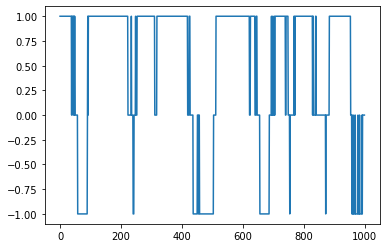

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(label['159928_48'][:1000])

In [5]:
X = data['159928_48']
y = label['159928_48']
X.shape, y.shape

((1532193, 40), (1532193,))

In [6]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [7]:
unique,count=np.unique(test_y,return_counts=True)
data_count=dict(zip(unique,count))
data_count

{-1.0: 94650, 0.0: 120526, 1.0: 91263}

In [8]:
cumulative_y = np.ones_like(test_y)
cumulative_y[0] = test_y[0]
for i in range(1, len(test_y)):
    cumulative_y[i] = cumulative_y[i-1] + test_y[i]

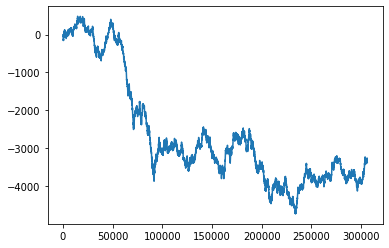

In [9]:
plt.plot(cumulative_y)

In [10]:
### logistic regression
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(train_X, train_y)
acc_softmax = softmax_reg.score(test_X, test_y)

In [11]:
acc_softmax

0.4535943531991685

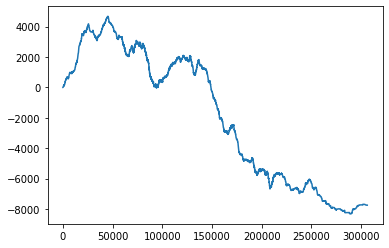

In [12]:

predict_y_softmax = softmax_reg.predict(test_X)
cumulative_y_softmax = np.ones_like(predict_y_softmax)
cumulative_y_softmax[0] = predict_y_softmax[0]
for i in range(1, len(predict_y_softmax)):
    cumulative_y_softmax[i] = cumulative_y_softmax[i-1] + predict_y_softmax[i]
plt.plot(cumulative_y_softmax)

In [42]:
print(accuracy_score(test_y, predict_y_softmax))

0.4535943531991685


In [13]:
unique,count=np.unique(predict_y_softmax,return_counts=True)
data_count_softmax=dict(zip(unique,count))
data_count_softmax

{-1.0: 62825, 0.0: 188537, 1.0: 55077}

### 把太多的预测成为了0

In [14]:
softmax_reg.coef_.shape

(3, 40)
















## random forest

In [15]:
### random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=500, random_state=0)
gridsearch = GridSearchCV(rf_clf, param_grid={'min_samples_split': [100, 1000, 10000], 'min_samples_leaf': [100, 1000, 10000]}, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
gridsearch.fit(X, y)
gridsearch.best_params_, gridsearch.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


({'min_samples_leaf': 1000, 'min_samples_split': 10000}, 0.40885384543592096)

In [16]:
# best_params_ = {'min_samples_leaf': 1000, 'min_samples_split': 10000}
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=10000, min_samples_leaf=1000, random_state=0)
rf_clf.fit(train_X, train_y)
acc_RF = rf_clf.score(test_X, test_y)
acc_RF

0.4526773680895708

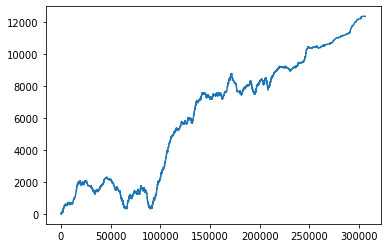

In [17]:
predict_y_rf = rf_clf.predict(test_X)
cumulative_y_rf = np.ones_like(predict_y_rf)
cumulative_y_rf[0] = predict_y_rf[0]
for i in range(1, len(predict_y_rf)):
    cumulative_y_rf[i] = cumulative_y_rf[i-1] + predict_y_rf[i]
plt.plot(cumulative_y_rf)

In [43]:
print(accuracy_score(test_y, predict_y_rf))

0.4526773680895708


In [18]:
unique,count=np.unique(predict_y_rf,return_counts=True)
data_count_rf=dict(zip(unique,count))
data_count_rf

{-1.0: 54206, 0.0: 185659, 1.0: 66574}

### SVM (poly kernel and RBF kernel)

In [65]:
### SVM_poly_kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC, SVC

In [17]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, C=5, coef0=1, max_iter=10000))
])

In [18]:
poly_kernel_svm_clf.fit(X, y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly', max_iter=10000))])

In [19]:
acc_SVC = poly_kernel_svm_clf.score(X, y)

In [20]:
acc_SVC

0.28571400600316016

In [66]:
RBF_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, max_iter=10000))
])

In [67]:
RBF_kernel_svm_clf.fit(train_X, train_y)

/Users/zhengyi/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5, max_iter=10000))])

In [68]:
acc_RBF = RBF_kernel_svm_clf.score(test_X, test_y)
acc_RBF

0.3086421767464324

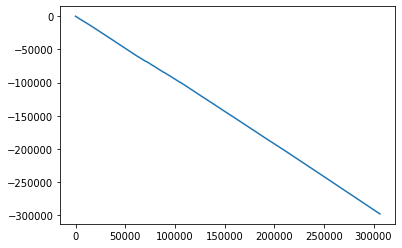

In [69]:
predict_y_rbf = RBF_kernel_svm_clf.predict(test_X)
cumulative_y_rbf = np.ones_like(predict_y_rbf)
cumulative_y_rbf[0] = predict_y_rbf[0]
for i in range(1, len(predict_y_rbf)):
    cumulative_y_rbf[i] = cumulative_y_rbf[i-1] + predict_y_rbf[i]
plt.plot(cumulative_y_rbf)

In [70]:
unique,count=np.unique(predict_y_rbf,return_counts=True)
data_count_rbf=dict(zip(unique,count))
data_count_rbf

{-1.0: 302207, 0.0: 241, 1.0: 3991}

## GBDT

In [22]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [23]:
lgm_model = lgb.LGBMClassifier(objective='multiclass', num_class=3, num_leaves=20, learning_rate=0.05, n_estimators=100)

In [24]:
gridsearch = GridSearchCV(lgm_model, param_grid={'num_leaves': [20, 30, 40, 50, 60], 'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1], 'n_estimators':[20, 30, 50, 70, 100]}, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [25]:
gridsearch.fit(X, y)
gridsearch.best_params_, gridsearch.best_score_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


({'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 20},
 0.43902498556773883)

In [59]:
lgm_model = lgb.LGBMClassifier(objective='multiclass', num_class=3, num_leaves=20, learning_rate=0.05, n_estimators=100)
lgm_model.fit(train_X, train_y, verbose=1)

LGBMClassifier(learning_rate=0.05, num_class=3, num_leaves=20,
               objective='multiclass')

In [60]:
lgm_model.score(test_X, test_y)

0.46456880488449576

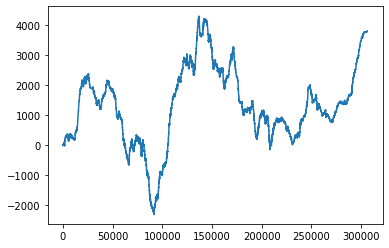

In [61]:
predict_y_lgm = lgm_model.predict(test_X)
cumulative_y_lgm = np.ones_like(predict_y_lgm)
cumulative_y_lgm[0] = predict_y_lgm[0]
for i in range(1, len(predict_y_lgm)):
    cumulative_y_lgm[i] = cumulative_y_lgm[i-1] + predict_y_lgm[i]
plt.plot(cumulative_y_lgm)

In [62]:
print(accuracy_score(test_y, predict_y_lgm))

0.46456880488449576


In [63]:
unique,count=np.unique(predict_y_lgm,return_counts=True)
data_count_lgm=dict(zip(unique,count))
data_count_lgm

{-1.0: 93684, 0.0: 115261, 1.0: 97494}

## MLP

In [55]:
### MLP
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

MLP_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 20, 10, 3), random_state=1, verbose=1, learning_rate_init=0.001)
MLP_clf.fit(train_X, train_y)

Iteration 1, loss = 1.04712858
Iteration 2, loss = 1.02875842
Iteration 3, loss = 1.02299818
Iteration 4, loss = 1.01846915
Iteration 5, loss = 1.01541933
Iteration 6, loss = 1.01331909
Iteration 7, loss = 1.01161444
Iteration 8, loss = 1.01016851
Iteration 9, loss = 1.00891678
Iteration 10, loss = 1.00793532
Iteration 11, loss = 1.00717178
Iteration 12, loss = 1.00643142
Iteration 13, loss = 1.00572026
Iteration 14, loss = 1.00373846
Iteration 15, loss = 1.00060558
Iteration 16, loss = 0.99778840
Iteration 17, loss = 0.99579072
Iteration 18, loss = 0.99451786
Iteration 19, loss = 0.99362502
Iteration 20, loss = 0.99274009
Iteration 21, loss = 0.99195609
Iteration 22, loss = 0.99157234
Iteration 23, loss = 0.99100773
Iteration 24, loss = 0.99062572
Iteration 25, loss = 0.99016663
Iteration 26, loss = 0.98995005
Iteration 27, loss = 0.98958321
Iteration 28, loss = 0.98925323
Iteration 29, loss = 0.98910844
Iteration 30, loss = 0.98869203
Iteration 31, loss = 0.98851012
Iteration 32, los

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(40, 20, 10, 3), random_state=1,
              verbose=1)

In [56]:
MLP_clf.score(test_X, test_y)

0.4488364731643166

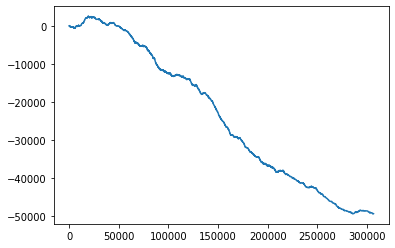

In [57]:
predict_y_mlp = MLP_clf.predict(test_X)
cumulative_y_mlp = np.ones_like(predict_y_mlp)
cumulative_y_mlp[0] = predict_y_mlp[0]
for i in range(1, len(predict_y_mlp)):
    cumulative_y_mlp[i] = cumulative_y_mlp[i-1] + predict_y_mlp[i]
plt.plot(cumulative_y_mlp)

In [58]:
unique,count=np.unique(predict_y_mlp,return_counts=True)
data_count_mlp=dict(zip(unique,count))
data_count_mlp

{-1.0: 114465, 0.0: 127006, 1.0: 64968}